                                                                    EDA - GOOGLE PLAYSTORE

Introduction - 

The Google Play Store is an enormous app store with millions of apps in various categories. Information on the type of apps, ranging from rating and price strategy to type and preference by the user, can be useful data for companies, developers, and advertising departments.

Objective - 
The goal of this analysis is conducting Exploratory Data Analysis (EDA) on the Google Play Store dataset in order to detect trends, patterns, and data points considered outliers. This particular analysis hopes to:
    1] Explore the distribution of app rating and discover the underlying driving forces.
    2] Discuss how paid and free apps differ.
    3] Examine category-based performance and content rating.
    4] Identify outliers and missing data for improved understanding of data quality.

                                                                            DATA PREPARATION

In [2]:
# Importing required python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading a csv file(.csv)
df = pd.read_csv('googleplaystore.csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
df.shape
# Returns (no. of rows, no. of columns)

(10841, 13)

In [5]:
df.dtypes
# Returns data type for each column

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [6]:
# 5 point summary
df.describe() # By default only for numeric data

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
df.describe(include = 'all') # including catergorical data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
df.head() # Returns 1st 5 rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
df.tail() # Returns last 5 rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [11]:
df.sample(2) # Returns random rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5904,A-Z Punjabi Songs & Music Videos 2018,FAMILY,4.3,367,5.1M,"100,000+",Free,0,Everyone,Entertainment,"May 17, 2018",1.0.19,4.1 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up


In [12]:
df.columns # Returns column names

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [13]:
df.duplicated().sum() # Returns count of duplicate value

483

In [14]:
df = df.drop_duplicates() # Drops duplicate rows
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [15]:
df.duplicated().sum()

0

In [16]:
df['App'].dtype

dtype('O')

In [17]:
df['Reviews'].dtype

dtype('O')

In [18]:
df['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10358, dtype: object

In [19]:
df.Reviews.unique() # No effective insight 

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

It is possible that in Review column there might be a value which is string and hence converting the whole colum in object.

In [21]:
df[~df.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [22]:
df_copy = df.copy()
df_copy

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


                                                            AIM : CONVERT REVIEWS COLUMN FROM OBJECT TO STRING 

In [24]:
''' To reset the index of df_copy
drop = True : means dropping the existing index and creating a new one
Inplace = True : means making changes in real dataframe(here it df_copy) '''

df_copy.reset_index(drop = True, inplace = True)
df_copy

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10355,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10356,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [25]:
df.isnull().sum() # Returns count of null values per category

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [26]:
df_copy[~df_copy.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9990,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [27]:
df_copy = df_copy.drop(df_copy.index[9990])
df_copy

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10355,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10356,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [28]:
df_copy['Reviews'] = df_copy['Reviews'].astype(int)
df_copy['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10353        38
10354         4
10355         3
10356       114
10357    398307
Name: Reviews, Length: 10357, dtype: int32

In [29]:
df_copy['Reviews'].dtype

dtype('int32')

In [30]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  int32  
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.1+ MB


                                                            AIM : CONVERTING SIZE COLUMN FROM OBJECT TO FLOAT

In [32]:
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10358, dtype: object

In [33]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [34]:
# 1MB = 1024KB
def size_process(item):
    if str(item)[-1] == 'M':
        res = float(str(item).replace('M', ''))
        res = res * 1024
        return res
    elif str(item)[-1] == 'k':
        res = float(str(item).replace('k',''))
        return res
    else:
        return str(np.NaN)

In [35]:
size_process('19M')

19456.0

In [36]:
df_copy['Size'] = df_copy['Size'].apply(size_process)


In [37]:
df_copy['Size'].unique() 

array([19456.0, 14336.0, 8908.8, 25600.0, 2867.2, 5734.4, 29696.0,
       33792.0, 3174.4, 28672.0, 12288.0, 20480.0, 21504.0, 37888.0,
       2764.8, 5632.0, 17408.0, 39936.0, 31744.0, 4300.8, 7168.0, 23552.0,
       6144.0, 6246.4, 4710.4, 9420.8, 5324.8, 11264.0, 24576.0, 'nan',
       9625.6, 15360.0, 10240.0, 1228.8, 26624.0, 8192.0, 8089.6, 57344.0,
       58368.0, 35840.0, 55296.0, 201.0, 3686.4, 5836.8, 8806.4, 2457.6,
       27648.0, 2560.0, 16384.0, 3481.6, 9113.6, 3993.6, 2969.6, 38912.0,
       32768.0, 5529.6, 18432.0, 1126.4, 2252.8, 4608.0, 10035.2, 53248.0,
       9216.0, 6860.8, 30720.0, 2662.4, 7270.4, 3788.8, 22528.0, 7577.6,
       6553.6, 3276.8, 8396.8, 10137.6, 5017.6, 9728.0, 5120.0, 6041.6,
       13312.0, 74752.0, 6963.2, 3584.0, 4096.0, 2355.2, 7372.8, 2150.4,
       43008.0, 7475.2, 9318.4, 56320.0, 23.0, 6656.0, 1536.0, 7680.0,
       52224.0, 41984.0, 49152.0, 8704.0, 47104.0, 8499.2, 4403.2, 4812.8,
       3379.2, 40960.0, 7987.2, 9011.2, 6758.4, 5222.4, 

In [38]:
df_copy['Size'] = df_copy['Size'].astype(float)
df_copy['Size'].dtype

dtype('float64')

In [39]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  int32  
 4   Size            8831 non-null   float64
 5   Installs        10357 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(2), int32(1), object(10)
memory usage: 1.1+ MB


                                                            AIM : CONVERTING INSTALLS COLUMN FROM OBJECT TO INT

In [41]:
df_copy['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10353         5,000+
10354           100+
10355         1,000+
10356         1,000+
10357    10,000,000+
Name: Installs, Length: 10357, dtype: object

In [42]:
df_copy['Installs'] = df_copy['Installs'].str.replace('+','').str.replace(',','')
df_copy['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10353        5000
10354         100
10355        1000
10356        1000
10357    10000000
Name: Installs, Length: 10357, dtype: object

In [43]:
df_copy['Installs'] = df_copy['Installs'].astype(int)

In [44]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  int32  
 4   Size            8831 non-null   float64
 5   Installs        10357 non-null  int32  
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(2), int32(2), object(9)
memory usage: 1.0+ MB


In [45]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


                                                            CONVERTING PRICE COLUMN FROM OBJECT TO FLOAT

In [47]:
df.Price

0        0
1        0
2        0
3        0
4        0
        ..
10836    0
10837    0
10838    0
10839    0
10840    0
Name: Price, Length: 10358, dtype: object

In [48]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [49]:
def price_process(item):
    if str(item)[0] == '$':
        res = float(str(item).replace('$', ''))
        return res 
    elif str(item) == '0':
        return 0
    else:
        return np.NaN

In [50]:
df_copy['Price'] = df_copy['Price'].apply(price_process)
df_copy['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10353    0.0
10354    0.0
10355    0.0
10356    0.0
10357    0.0
Name: Price, Length: 10357, dtype: float64

In [51]:
df_copy['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [52]:
df_c = df.copy()
df_c

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [53]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [54]:
char_to_remove = ['+',',','$']
cols_to_remove = ['Installs','Price']

for char in char_to_remove:
    for col in cols_to_remove:
        df_c[col] = df_c[col].str.replace(char, '')

In [55]:
# CONVERTING LAST UPDATED COLUMN INTO DATE TIME FORMAT

In [56]:
df['Last Updated']

0         January 7, 2018
1        January 15, 2018
2          August 1, 2018
3            June 8, 2018
4           June 20, 2018
               ...       
10836       July 25, 2017
10837        July 6, 2018
10838    January 20, 2017
10839    January 19, 2015
10840       July 25, 2018
Name: Last Updated, Length: 10358, dtype: object

In [57]:
df_copy['Last Updated'] = pd.to_datetime(df_copy['Last Updated'])
df_copy['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10353   2017-07-25
10354   2018-07-06
10355   2017-01-20
10356   2015-01-19
10357   2018-07-25
Name: Last Updated, Length: 10357, dtype: datetime64[ns]

                                                            CREATING NEW COLUMNS FOR DAY, MONTH, YEAR DROPPING LAST UPDATED

In [59]:
df_copy['Day'] = df_copy['Last Updated'].dt.day

In [60]:
df_copy['Month'] = df_copy['Last Updated'].dt.month

In [61]:
df_copy['Year'] = df_copy['Last Updated'].dt.year

In [62]:
df_copy.drop('Last Updated', axis = 1, inplace = True)

In [63]:
df_copy

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,Sya9a Maroc - FR,FAMILY,4.5,38,54272.0,5000,Free,0.0,Everyone,Education,1.48,4.1 and up,25,7,2017
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.4,100,Free,0.0,Everyone,Education,1.0,4.1 and up,6,7,2018
10355,Parkinson Exercices FR,MEDICAL,NaN,3,9728.0,1000,Free,0.0,Everyone,Medical,1.0,2.2 and up,20,1,2017
10356,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,Varies with device,Varies with device,19,1,2015


In [64]:
df_copy['Android Ver']

0              4.0.3 and up
1              4.0.3 and up
2              4.0.3 and up
3                4.2 and up
4                4.4 and up
                ...        
10353            4.1 and up
10354            4.1 and up
10355            2.2 and up
10356    Varies with device
10357    Varies with device
Name: Android Ver, Length: 10357, dtype: object

In [65]:
df_copy['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [66]:
df_copy['Android Ver'] = df_copy['Android Ver'].str.replace(' and up', '').str.replace('Varies with device', '')
df_copy['Android Ver'].unique()

array(['4.0.3', '4.2', '4.4', '2.3', '3.0', '4.1', '4.0', '2.3.3', '',
       '2.2', '5.0', '6.0', '1.6', '1.5', '2.1', '7.0', '5.1', '4.3',
       '4.0.3 - 7.1.1', '2.0', '3.2', '4.4W', '7.1', '7.0 - 7.1.1', '8.0',
       '5.0 - 8.0', '3.1', '2.0.1', '4.1 - 7.1.1', nan, '5.0 - 6.0',
       '1.0', '2.2 - 7.1.1', '5.0 - 7.1.1'], dtype=object)

In [67]:
df_copy['Android Ver'] = df_copy['Android Ver'].str.replace('W', '')
df_copy['Android Ver'].unique()

array(['4.0.3', '4.2', '4.4', '2.3', '3.0', '4.1', '4.0', '2.3.3', '',
       '2.2', '5.0', '6.0', '1.6', '1.5', '2.1', '7.0', '5.1', '4.3',
       '4.0.3 - 7.1.1', '2.0', '3.2', '7.1', '7.0 - 7.1.1', '8.0',
       '5.0 - 8.0', '3.1', '2.0.1', '4.1 - 7.1.1', nan, '5.0 - 6.0',
       '1.0', '2.2 - 7.1.1', '5.0 - 7.1.1'], dtype=object)

                                                            REMOVING DUPLICATES FROM APP COLUMN

In [69]:
df['App'].count()

10358

In [70]:
df_copy.drop_duplicates(subset = ['App'], keep = 'first', inplace= True)

In [71]:
df_copy['App'].duplicated().sum()

0

In [72]:
df_copy['App'].count()

9659

In [73]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10357
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int32  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   int32  
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Current Ver     9651 non-null   object 
 11  Android Ver     9657 non-null   object 
 12  Day             9659 non-null   int32  
 13  Month           9659 non-null   int32  
 14  Year            9659 non-null   int32  
dtypes: float64(3), int32(5), object(7)
memory usage: 1018.7+ KB


                                                            Exploratory Data Analysis

In [74]:
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']
categorical_features

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

In [75]:
numerical_feature = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']
numerical_feature

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year']

In [76]:
df_copy[categorical_features]

,App,Category,Type,Content Rating,Genres,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,Art & Design,1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,Everyone,Art & Design,1.2.4,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,Teen,Art & Design,Varies with device,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone,Art & Design;Creativity,1.1,4.4
...,...,...,...,...,...,...,...
10353,Sya9a Maroc - FR,FAMILY,Free,Everyone,Education,1.48,4.1
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,Free,Everyone,Education,1.0,4.1
10355,Parkinson Exercices FR,MEDICAL,Free,Everyone,Medical,1.0,2.2
10356,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,Free,Mature 17+,Books & Reference,Varies with device,


                                                            Categorical features analysis

In [78]:
df_copy['Type'].value_counts()

Type
Free    8902
Paid     756
Name: count, dtype: int64

In [79]:
df_copy['Type'].value_counts(normalize=True)

Type
Free    0.921723
Paid    0.078277
Name: proportion, dtype: float64

In [80]:
df_copy['Category'].value_counts()

Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64

In [81]:
df_copy['Category'].value_counts(normalize=True)

Category
FAMILY                 0.189668
GAME                   0.099286
TOOLS                  0.085620
BUSINESS               0.043483
MEDICAL                0.040895
PERSONALIZATION        0.038927
PRODUCTIVITY           0.038720
LIFESTYLE              0.038203
FINANCE                0.035718
SPORTS                 0.033647
COMMUNICATION          0.032612
HEALTH_AND_FITNESS     0.029817
PHOTOGRAPHY            0.029092
NEWS_AND_MAGAZINES     0.026297
SOCIAL                 0.024744
BOOKS_AND_REFERENCE    0.022984
TRAVEL_AND_LOCAL       0.022673
SHOPPING               0.020913
DATING                 0.017704
VIDEO_PLAYERS          0.016875
MAPS_AND_NAVIGATION    0.013562
EDUCATION              0.012320
FOOD_AND_DRINK         0.011595
ENTERTAINMENT          0.010560
AUTO_AND_VEHICLES      0.008800
LIBRARIES_AND_DEMO     0.008697
WEATHER                0.008179
HOUSE_AND_HOME         0.007661
EVENTS                 0.006626
ART_AND_DESIGN         0.006626
PARENTING              0.006212

In [82]:
df_copy['Content Rating'].value_counts()

Content Rating
Everyone           7903
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

In [83]:
df_copy['Content Rating'].value_counts(normalize=True)

Content Rating
Everyone           0.818201
Teen               0.107257
Mature 17+         0.040687
Everyone 10+       0.033337
Adults only 18+    0.000311
Unrated            0.000207
Name: proportion, dtype: float64

In [84]:
df_copy['Genres'].value_counts()

Genres
Tools                              826
Entertainment                      561
Education                          510
Business                           420
Medical                            395
                                  ... 
Art & Design;Pretend Play            1
Lifestyle;Pretend Play               1
Comics;Creativity                    1
Art & Design;Action & Adventure      1
Strategy;Creativity                  1
Name: count, Length: 118, dtype: int64

In [85]:
df_copy['Genres'].value_counts(normalize= True)

Genres
Tools                              0.085516
Entertainment                      0.058081
Education                          0.052800
Business                           0.043483
Medical                            0.040895
                                     ...   
Art & Design;Pretend Play          0.000104
Lifestyle;Pretend Play             0.000104
Comics;Creativity                  0.000104
Art & Design;Action & Adventure    0.000104
Strategy;Creativity                0.000104
Name: proportion, Length: 118, dtype: float64

In [86]:
df_copy['Current Ver'].value_counts()

Current Ver
Varies with device    1055
1.0                    799
1.1                    260
1.2                    176
2.0                    149
                      ... 
2.27.1                   1
1.6.11                   1
20180517                 1
3.1.00                   1
2.0.148.0                1
Name: count, Length: 2817, dtype: int64

In [87]:
df_copy['Current Ver'].value_counts(normalize=True)

Current Ver
Varies with device    0.109315
1.0                   0.082789
1.1                   0.026940
1.2                   0.018236
2.0                   0.015439
                        ...   
2.27.1                0.000104
1.6.11                0.000104
20180517              0.000104
3.1.00                0.000104
2.0.148.0             0.000104
Name: proportion, Length: 2817, dtype: float64

In [88]:
df_copy['Android Ver'].value_counts()

Android Ver
4.1              2202
4.0.3            1395
4.0              1285
                  990
4.4               829
2.3               616
5.0               512
4.2               372
2.3.3             273
2.2               239
3.0               231
4.3               221
2.1               133
1.6               116
6.0                54
7.0                42
3.2                36
2.0                32
5.1                22
1.5                20
3.1                10
2.0.1               7
8.0                 6
7.1                 3
4.0.3 - 7.1.1       2
5.0 - 8.0           2
1.0                 2
7.0 - 7.1.1         1
4.1 - 7.1.1         1
5.0 - 6.0           1
2.2 - 7.1.1         1
5.0 - 7.1.1         1
Name: count, dtype: int64

In [89]:
df_copy['Android Ver'].value_counts(normalize=True)

Android Ver
4.1              0.228021
4.0.3            0.144455
4.0              0.133064
                 0.102516
4.4              0.085844
2.3              0.063788
5.0              0.053019
4.2              0.038521
2.3.3            0.028270
2.2              0.024749
3.0              0.023920
4.3              0.022885
2.1              0.013772
1.6              0.012012
6.0              0.005592
7.0              0.004349
3.2              0.003728
2.0              0.003314
5.1              0.002278
1.5              0.002071
3.1              0.001036
2.0.1            0.000725
8.0              0.000621
7.1              0.000311
4.0.3 - 7.1.1    0.000207
5.0 - 8.0        0.000207
1.0              0.000207
7.0 - 7.1.1      0.000104
4.1 - 7.1.1      0.000104
5.0 - 6.0        0.000104
2.2 - 7.1.1      0.000104
5.0 - 7.1.1      0.000104
Name: proportion, dtype: float64

In [90]:
# Instead of doing it seperately for each column we can just use for loop to calculate value_counts for every column as once

for col in categorical_features:
    value_counts = (df_copy[col].value_counts(normalize=True)*100)
    print(value_counts)

App
Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: proportion, Length: 9659, dtype: float64
Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036
LIFESTYLE               3.820271
FINANCE                 3.5

In [91]:
# For better presentation we use f-literal
for col in categorical_features:
    print (f"{col} : {df_copy[col].value_counts(normalize=True)*100}")

App : App
Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: proportion, Length: 9659, dtype: float64
Category : Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036
LIFESTYLE               3.820271
FINANCE   

In [92]:
# PLOTS 

In [93]:
df['Type'].value_counts(normalize=True)

Type
Free    0.926040
Paid    0.073863
0       0.000097
Name: proportion, dtype: float64

<Axes: xlabel='Type', ylabel='count'>

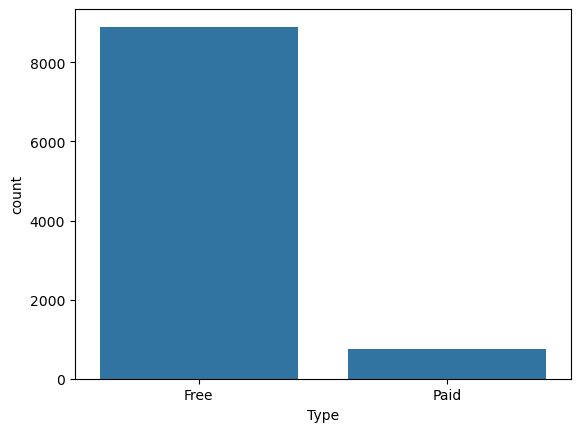

In [94]:
sns.countplot(x = df_copy['Type'])

Insight :
This plot tells a very clear story about the app market: majority of the apps are free. 
This stark visual difference shows that developers are overwhelmingly choosing to offer their apps for free, likely relying on other monetization strategies like in-app purchases or ads.

<Axes: xlabel='Content Rating', ylabel='count'>

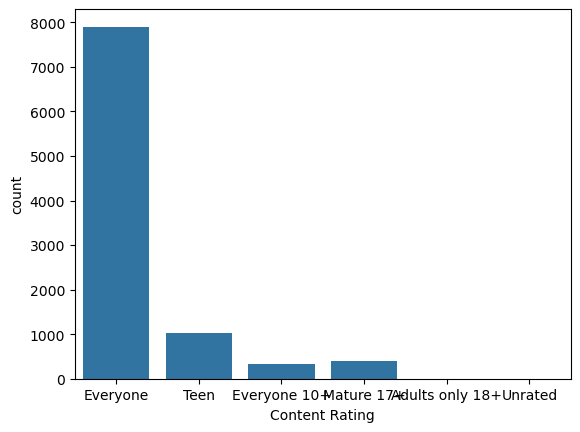

In [95]:
sns.countplot(x = df_copy['Content Rating'])

Insights -
Everyone" is the dominant category. The vast majority of apps are rated for "Everyone," with a count of over 8,000. This indicates that the app market is heavily skewed 
towards general-audience content.
Teen" is the second most common rating. The "Teen" category has the next-highest count, although it's significantly smaller than "Everyone," at just over 1,000.
Other categories have very low representation. All other content ratings—"Everyone 10+", "Mature 17+", "Adults only 18+", and "Unrated"—have a very small number of apps. 
The counts for these categories are all under 500, with some being almost negligible.

                                                            NUMERICAL FEATURES

In [97]:
numerical_feature

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year']

<Axes: xlabel='Price', ylabel='Density'>

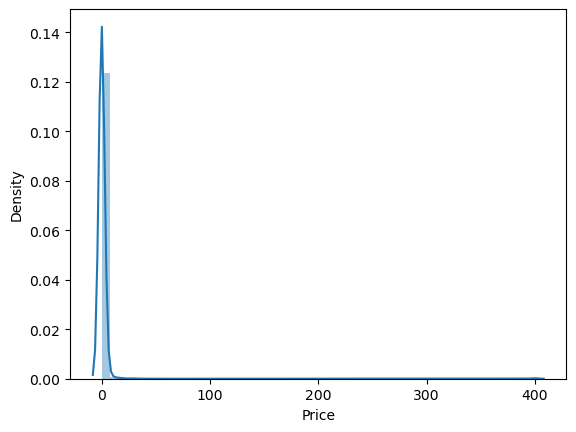

In [98]:
sns.distplot(df_copy['Price'], kde = True)

Insights -
Vast Majority of Apps are Free or Very Cheap - The plot shows a heavy concentration of data points at or near zero.
Highly Skewed Distribution - The distribution is extremely right-skewed
Presence of Outliers: The plot extends out to prices over $400, indicating the presence of outliers

<Axes: xlabel='Rating', ylabel='Density'>

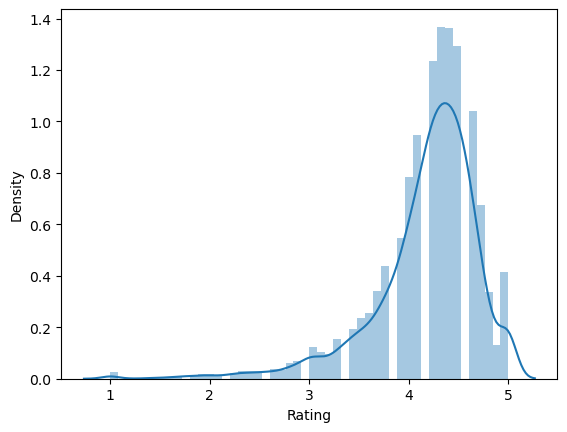

In [99]:
sns.distplot(df_copy['Rating'], kde = True)

Insights - 
Ratings are generally high. The plot shows a strong concentration of data points on the right side of the graph, with a peak between 4.0 and 4.5. This indicates that most apps have a high rating.
The distribution is left-skewed. The long tail extending to the left suggests that while most apps are highly rated, there are a few apps with very low ratings. The sharp peak indicates a high density of apps in the 4-5 star range.

<Axes: xlabel='Rating', ylabel='Density'>

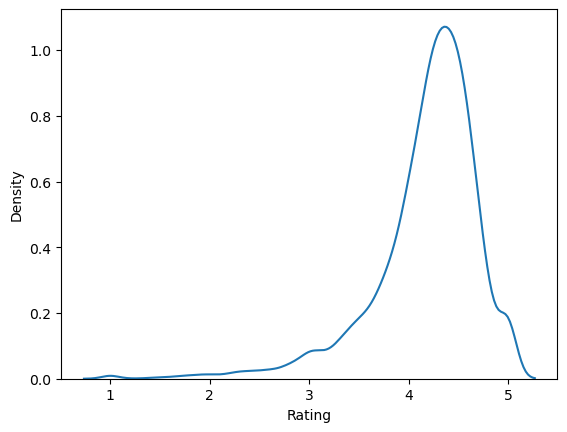

In [100]:
sns.kdeplot(df_copy.Rating)

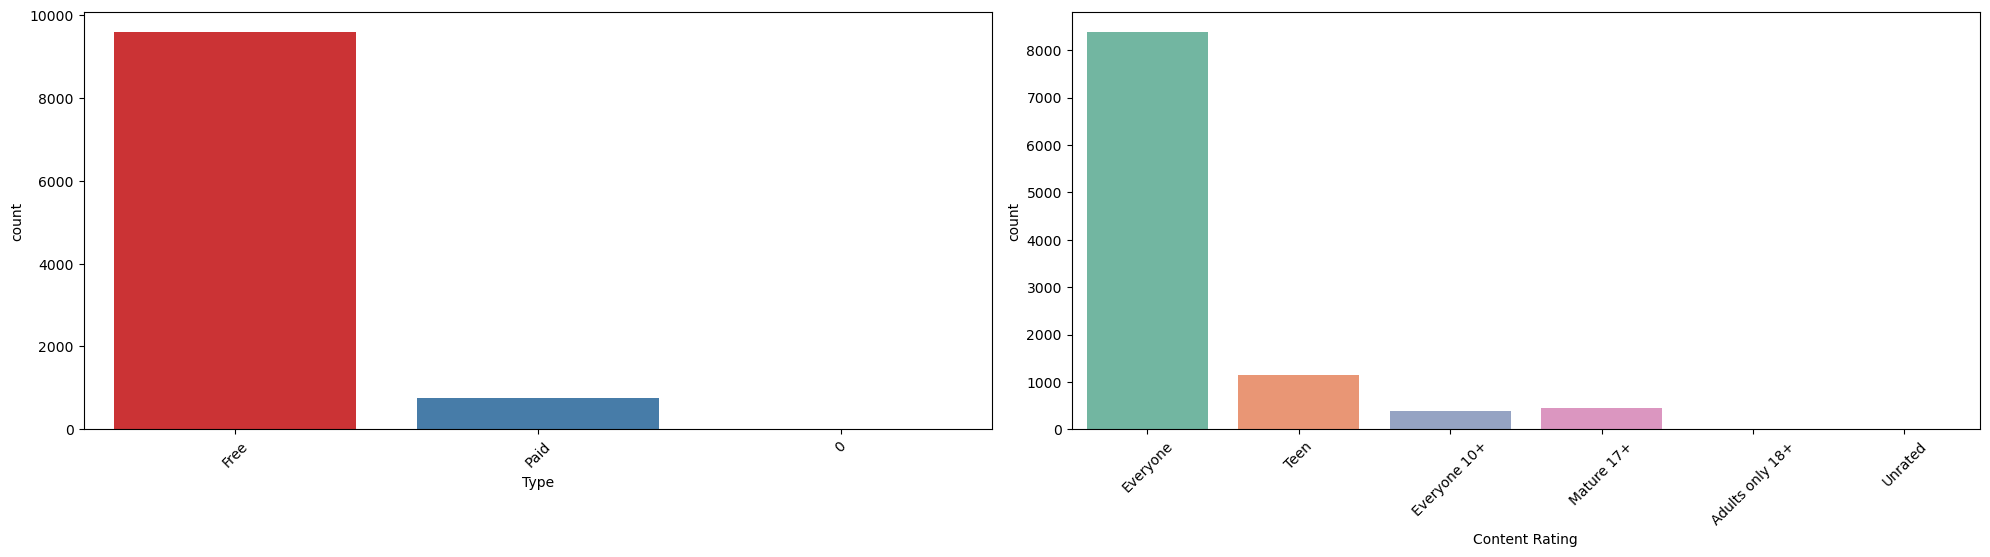

In [101]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.countplot(x = df['Type'], palette='Set1')
plt.xlabel('Type')
plt.xticks(rotation = 45)

plt.subplot(2,2,2)
sns.countplot(x = df['Content Rating'], palette='Set2')
plt.xlabel('Content Rating')
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

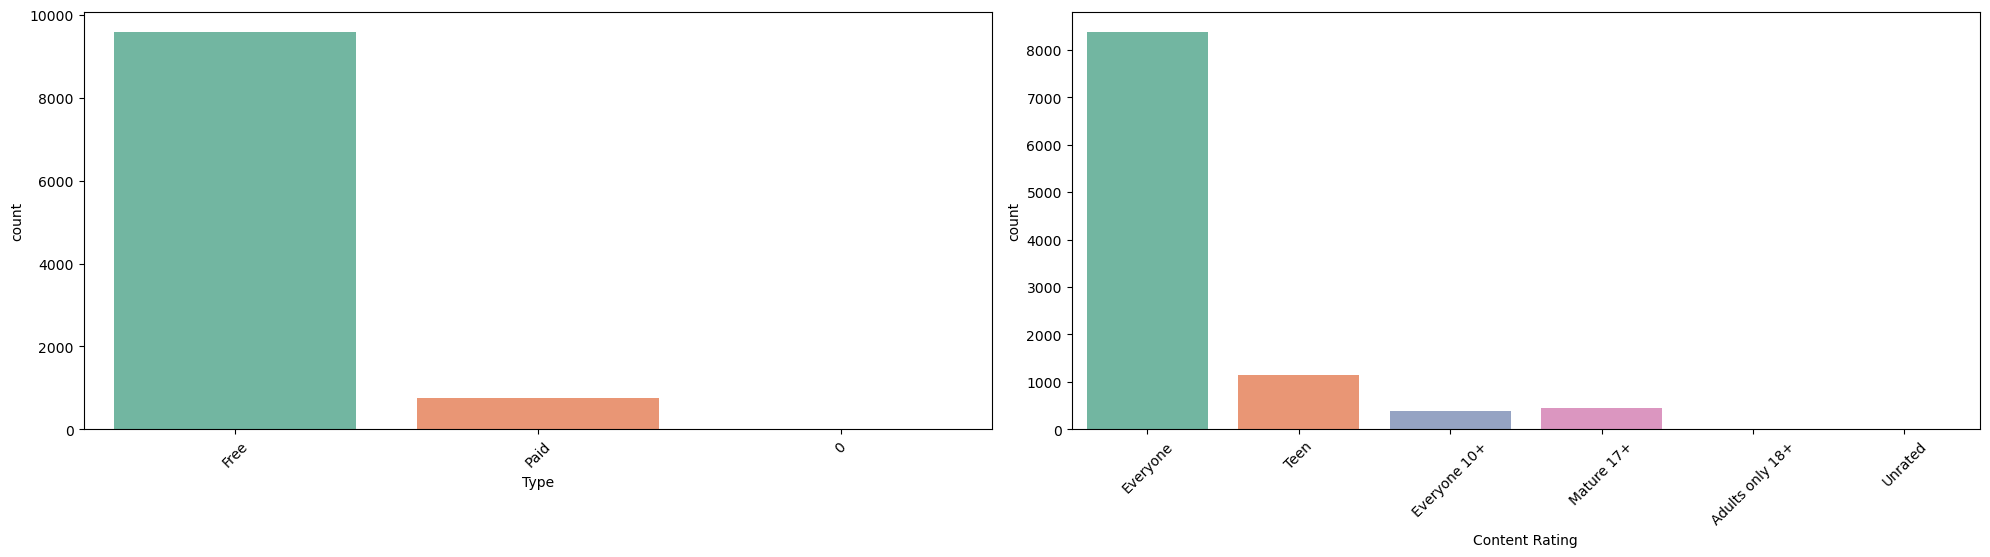

In [102]:
plt.figure(figsize=(20,10))
catergory = ['Type', 'Content Rating']
for i in range(0,len(catergory)):
    plt.subplot(2,2,i+1)
    sns.countplot(x = df[catergory[i]], palette='Set2')
    plt.xlabel(catergory[i])
    plt.xticks(rotation = 45)
    plt.tight_layout()

In [103]:
# Which category is the most popular category in the app

In [104]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

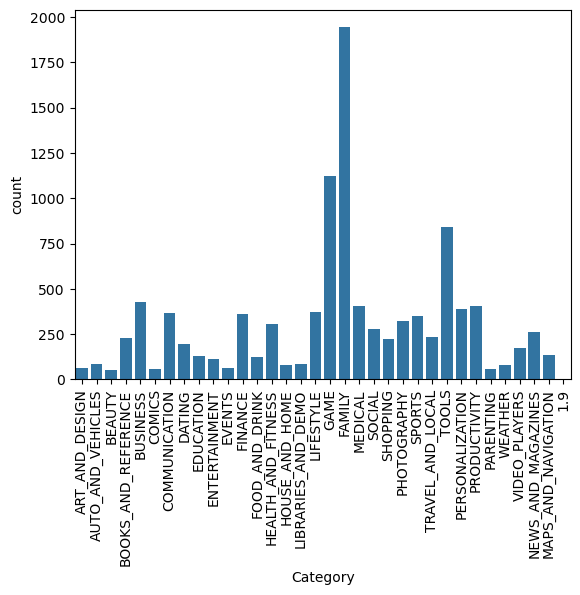

In [105]:
sns.countplot(x = df['Category'])
plt.xticks(rotation = 90)
plt.show()

<Axes: ylabel='count'>

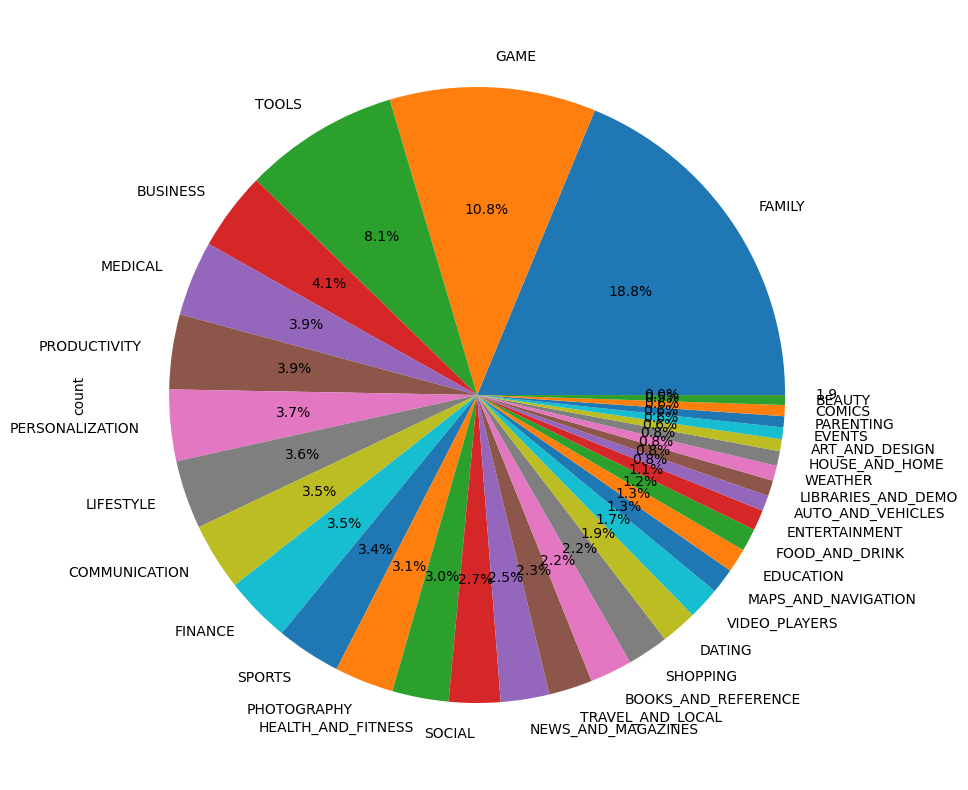

In [106]:
df['Category'].value_counts().plot.pie(y = df['Category'],figsize = (12,10) , autopct = '%1.1f%%')

INSIGHTS :-
The most popular category is Family with 19% of share followed by game and tool

In [108]:
# Q2]  What is top 10 most popular category ?

<Axes: ylabel='count'>

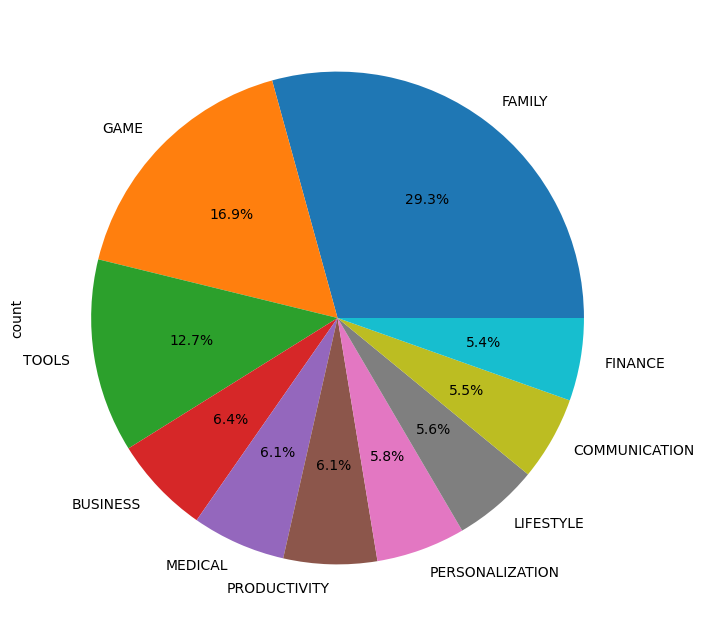

In [109]:
df['Category'].value_counts()[:10].plot.pie(y = df['Category'], figsize = (12,8), autopct = '%1.1f%%')

In [110]:
cat = df['Category'].value_counts()[:10]
cat

Category
FAMILY             1943
GAME               1121
TOOLS               843
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     388
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: count, dtype: int64

In [111]:
category = cat.reset_index()
category

,Category,count
0,FAMILY,1943
1,GAME,1121
2,TOOLS,843
3,BUSINESS,427
4,MEDICAL,408
5,PRODUCTIVITY,407
6,PERSONALIZATION,388
7,LIFESTYLE,373
8,COMMUNICATION,366
9,FINANCE,360


In [112]:
category.columns = ['Groups','Count']
category

,Groups,Count
0,FAMILY,1943
1,GAME,1121
2,TOOLS,843
3,BUSINESS,427
4,MEDICAL,408
5,PRODUCTIVITY,407
6,PERSONALIZATION,388
7,LIFESTYLE,373
8,COMMUNICATION,366
9,FINANCE,360


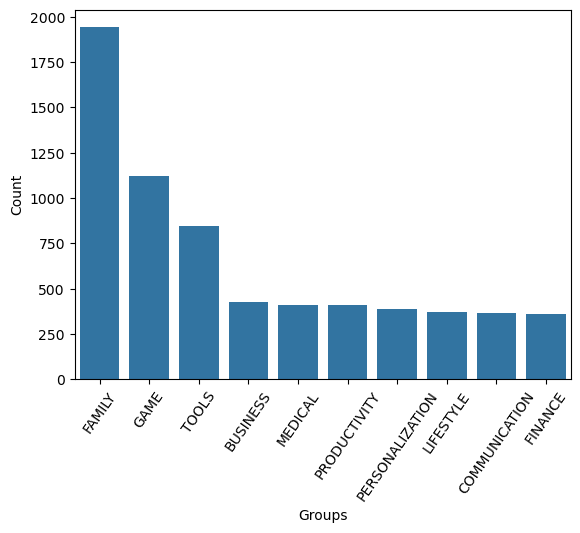

In [113]:
sns.barplot(x = category['Groups'], y = category['Count'])
plt.xticks(rotation = 55)
plt.show()

In [114]:
# Which category has the highest installation
df_copy['Installs'].groupby(df_copy['Category']).sum().sort_values(ascending = False).reset_index()

,Category,Installs
0,GAME,13878924415
1,COMMUNICATION,11038276251
2,TOOLS,8001771915
3,PRODUCTIVITY,5793091369
4,SOCIAL,5487867902
5,PHOTOGRAPHY,4649147655
6,FAMILY,4427941505
7,VIDEO_PLAYERS,3926902720
8,TRAVEL_AND_LOCAL,2894887146
9,NEWS_AND_MAGAZINES,2369217760


In [115]:
# While both yield the same output, the second one is often preferred in the pandas community for its clarity and consistency with the DataFrame API. It follows a logical
# flow: df -> groupby -> select column -> aggregate.
df_copy.groupby(['Category'])['Installs'].sum().sort_values(ascending=False).reset_index()

,Category,Installs
0,GAME,13878924415
1,COMMUNICATION,11038276251
2,TOOLS,8001771915
3,PRODUCTIVITY,5793091369
4,SOCIAL,5487867902
5,PHOTOGRAPHY,4649147655
6,FAMILY,4427941505
7,VIDEO_PLAYERS,3926902720
8,TRAVEL_AND_LOCAL,2894887146
9,NEWS_AND_MAGAZINES,2369217760


<Axes: ylabel='Rating'>

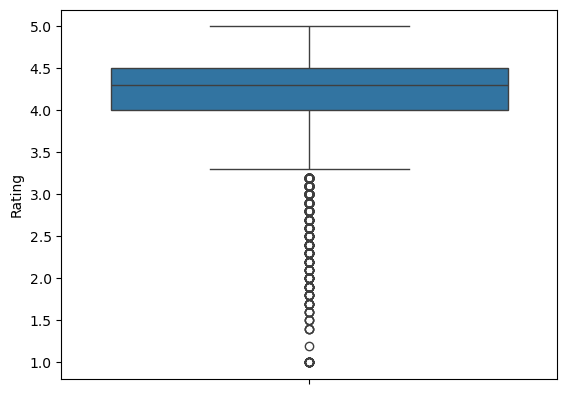

In [118]:
sns.boxplot(df_copy['Rating'])

INSIGHTS :-
The distribution of ratings is highly concentrated between 4.0 and 4.5, indicating generally positive user feedback.
However, there are significant outliers below 3.0, which represent apps with poor user ratings. 
These outliers suggest that while most apps maintain high quality, a small subset performs poorly in terms of user satisfaction

<Axes: xlabel='Installs', ylabel='Rating'>

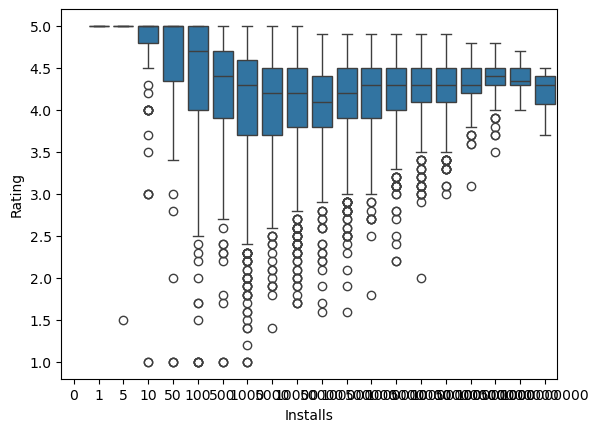

In [117]:
sns.boxplot(x = 'Installs', y  = 'Rating', data = df_copy)

In [119]:
df_copy

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4,20,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,Sya9a Maroc - FR,FAMILY,4.5,38,54272.0,5000,Free,0.0,Everyone,Education,1.48,4.1,25,7,2017
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.4,100,Free,0.0,Everyone,Education,1.0,4.1,6,7,2018
10355,Parkinson Exercices FR,MEDICAL,NaN,3,9728.0,1000,Free,0.0,Everyone,Medical,1.0,2.2,20,1,2017
10356,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,Varies with device,,19,1,2015


In [120]:
# What are top 5 installed category apps

In [128]:
df_copy.groupby(['Category','Type'])['Installs'].sum().sort_values(ascending = False)[:5]

Category       Type
GAME           Free    13857924450
COMMUNICATION  Free    11036916201
TOOLS          Free     8000044474
PRODUCTIVITY   Free     5791679314
SOCIAL         Free     5487861902
Name: Installs, dtype: int64

In [129]:
# Which category app users are reviewing the most??

In [134]:
df_copy.groupby(['Category'])['Reviews'].sum().sort_values(ascending = False)

Category
GAME                   622298709
COMMUNICATION          285811368
TOOLS                  229356578
SOCIAL                 227927801
FAMILY                 143825488
PHOTOGRAPHY            105351270
VIDEO_PLAYERS           67484568
PRODUCTIVITY            55590649
PERSONALIZATION         53543080
SHOPPING                44551730
SPORTS                  35348813
ENTERTAINMENT           34762650
TRAVEL_AND_LOCAL        26819741
NEWS_AND_MAGAZINES      23130228
HEALTH_AND_FITNESS      21361355
MAPS_AND_NAVIGATION     17729148
BOOKS_AND_REFERENCE     16721314
EDUCATION               13364148
FINANCE                 12662106
WEATHER                 12295164
LIFESTYLE               11832671
BUSINESS                 9890245
FOOD_AND_DRINK           6325028
DATING                   3623544
COMICS                   2342071
HOUSE_AND_HOME           1929847
ART_AND_DESIGN           1419203
MEDICAL                  1182971
AUTO_AND_VEHICLES        1163666
PARENTING                 958331
L

INSIGHTS :-
Game category app users are reviewing the most